In [2]:
import sympy as sym
from sympy import Matrix
import math

from mitroiki_functs import K_with_axial
from mitroiki_functs import TranformMatrix
from mitroiki_functs import round_expr
from mitroiki_functs import P_uniformly_distributed_load

import openseespy.opensees as ops
import opsvis as opsv
import matplotlib.pyplot as plt

from IPython.display import Image

# Εφαρμογή 8 - Χρήση μητρώων μετασχηματισμού σε μη ορθογωνικό φορέα

Να υπολογιστούν οι αντιδράσεις στήριξης, οι παραμορφώσεις και τα διαγράμματα των εντατικών μεγεθών για τον φορέα του σχήματος.

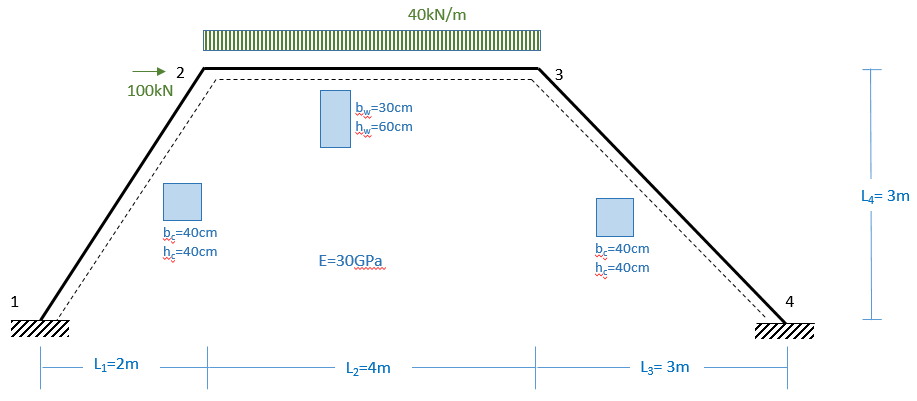

In [316]:
Image("https://raw.githubusercontent.com/panagop/ihu_courses/main/shared/images/mitroa/example8/ekfonisi.png", width=800)

In [40]:
E = 200_000_000.
A = 1e-4

L = 10.

F = 100.

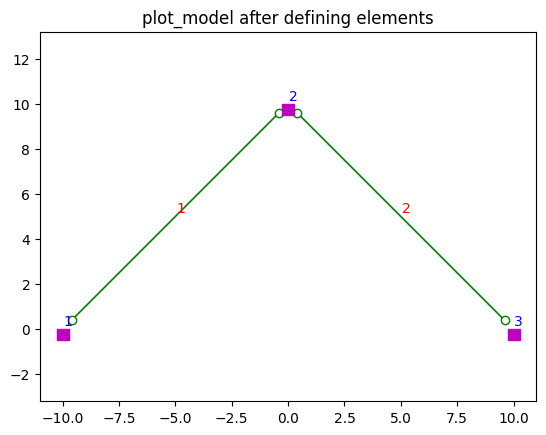

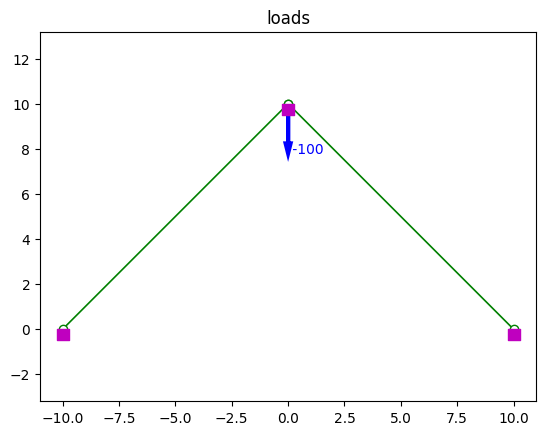

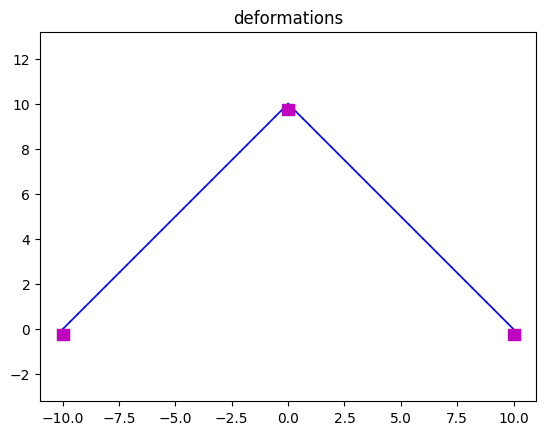

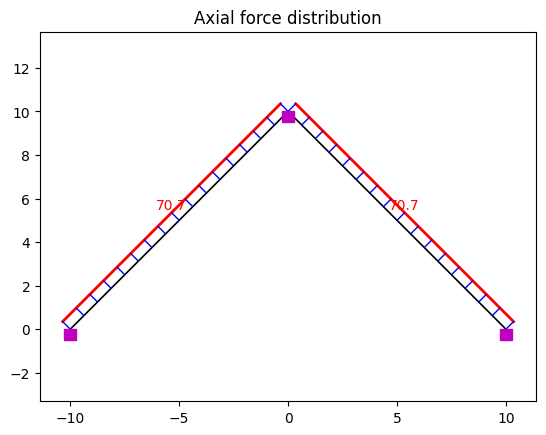

In [41]:
ops.wipe()
ops.model('basic', '-ndm', 2, '-ndf', 3)

ops.node(1, -L, 0)
ops.node(2, 0, L)
ops.node(3, L, 0)

ops.fix(1, 1, 1, 1)
ops.fix(2, 0, 0, 1)
ops.fix(3, 1, 1, 1)

# define materials
ops.uniaxialMaterial("Elastic", 1, E)

ops.geomTransf('Linear', 1)

# elements
ops.element('Truss', 1, 1, 2, A, 1)
ops.element('Truss', 2, 2, 3, A, 1)


# loads
ops.timeSeries('Linear', 1)
ops.pattern('Plain', 1, 1)

ops.load(2, 0, -F, 0)



# analysis
ops.constraints('Plain')
ops.numberer('RCM')
ops.system('BandSPD')
# ops.test('NormDispIncr', 1.0e-6, 6, 2)
ops.integrator('LoadControl', 1.0)
ops.algorithm('Linear')
ops.analysis('Static')
ops.analyze(1)

# results
# ops.printModel()
opsv.plot_model()
plt.title('plot_model after defining elements')

opsv.plot_loads_2d()
plt.title('loads')

sfac = .01
opsv.plot_defo(sfac)
plt.title('deformations')

sfacN, sfacV, sfacM = 7.e-3, 6.e-3, 4.e-3
opsv.section_force_diagram_2d('N', sfacN)
plt.title('Axial force distribution')

plt.show()


In [42]:
for i in range(1,4):
    print(ops.nodeDisp(i))

[0.0, 0.0, 0.0]
[0.0, -0.07071067811865477, 0.0]
[0.0, 0.0, 0.0]
